In [1]:
import geopandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# !pip install geopandas

   fid                                           geometry
0  1.0  LINESTRING (-75.01600 -7.73408, -75.01099 -7.7...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1 non-null      float64 
 1   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 144.0 bytes
None
EPSG:4326


<AxesSubplot:>

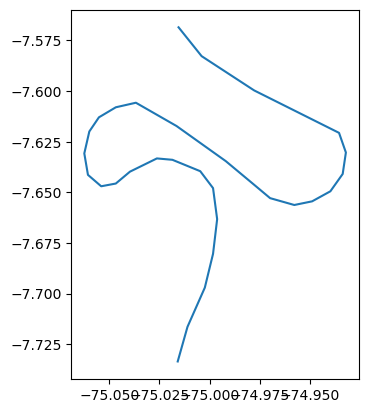

In [3]:
import geopandas as gpd

# Ruta al archivo Shapefile
shapefile_path = './Original.shp'

# Leer el archivo Shapefile y crear un GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Imprimir información básica sobre el GeoDataFrame
print(gdf.head())  # Muestra los primeros registros
print(gdf.info())  # Muestra información sobre las columnas y tipos de datos
print(gdf.crs)     # Muestra el sistema de referencia de coordenadas (CRS)

# Visualizar el GeoDataFrame en un gráfico
gdf.plot()


   fid                                           geometry
0  1.0  LINESTRING (-75.01600 -7.73408, -75.01099 -7.7...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1 non-null      float64 
 1   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 144.0 bytes
None
EPSG:4326
   fid                                           geometry
0  1.0  LINESTRING (-75.01441 -7.73509, -75.00508 -7.7...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1 non-null      float64 
 1   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 144.0 bytes
None
EPSG:4326


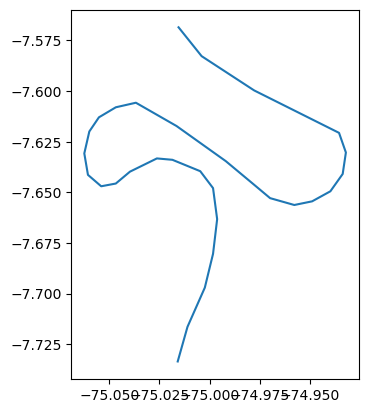

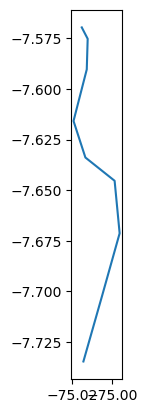

In [4]:
import geopandas as gpd

def cargar_geodataframe(ruta):
    gdf = gpd.read_file(ruta)
    print(gdf.head())
    print(gdf.info())
    print(gdf.crs)
    gdf.plot()

# Rutas a los archivos Shapefile
ruta_original = './Original.shp'
ruta_migracion = './Migracion.shp'

# Cargar y mostrar el GeoDataFrame para el archivo Original
cargar_geodataframe(ruta_original)

# Cargar y mostrar el GeoDataFrame para el archivo de Migración
cargar_geodataframe(ruta_migracion)


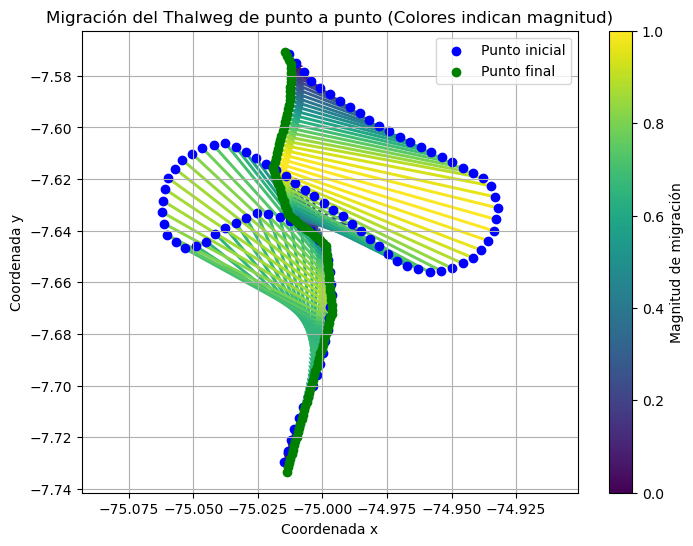

In [5]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para normalizar y asignar colores
def color_mapper(values, cmap='viridis', log_norm=True):
    if log_norm:
        norm = LogNorm(vmin=np.min(values), vmax=np.max(values))
    else:
        norm = Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = plt.get_cmap(cmap)
    return cmap(norm(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis', log_norm=False)
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Magnitud de migración')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


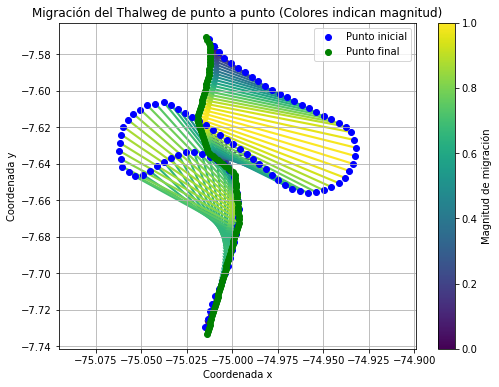

In [14]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis', log_norm=False):
    norm = Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = plt.get_cmap(cmap)
    return cmap(norm(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis', log_norm=False)
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Magnitud de migración')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


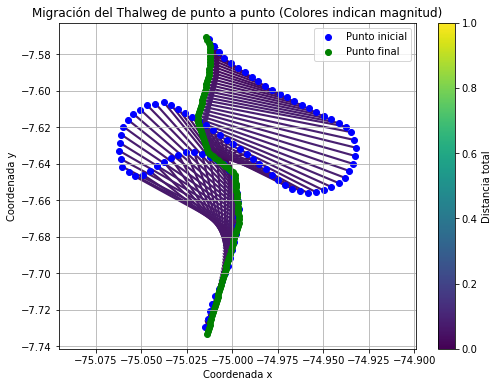

In [16]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values)

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


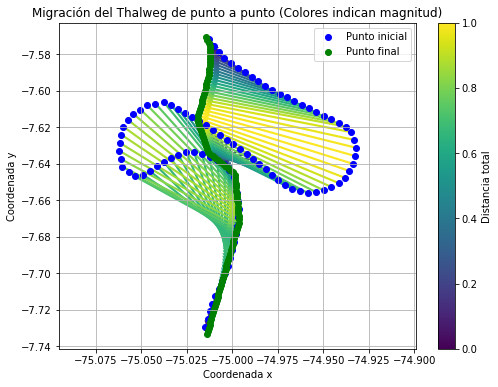

In [48]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values / np.max(values))  # Dividir por el máximo valor para obtener la escala correcta

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


         O_y        O_x
0  -7.729734 -75.014765
1  -7.725391 -75.013529
2  -7.721048 -75.012293
3  -7.716706 -75.011057
4  -7.712571 -75.009248
..       ...        ...
95 -7.584774 -75.000804
96 -7.582139 -75.004431
97 -7.578626 -75.007267
98 -7.575112 -75.010102
99 -7.571598 -75.012938

[100 rows x 2 columns]
         O_y        O_x       M_y        M_x       NN_x      NN_y
0  -7.729734 -75.014765 -7.733394 -75.013921 -75.012946 -7.730001
1  -7.725391 -75.013529 -7.731698 -75.013433 -75.011971 -7.726608
2  -7.721048 -75.012293 -7.730001 -75.012946 -75.010508 -7.721518
3  -7.716706 -75.011057 -7.728305 -75.012458 -75.009046 -7.716428
4  -7.712571 -75.009248 -7.726608 -75.011971 -75.008071 -7.713035
..       ...        ...       ...        ...        ...       ...
95 -7.584774 -75.000804 -7.577142 -75.012191 -75.012404 -7.584200
96 -7.582139 -75.004431 -7.575378 -75.012138 -75.012351 -7.582436
97 -7.578626 -75.007267 -7.573792 -75.012864 -75.012244 -7.578907
98 -7.575112 -75.010102 -7.5

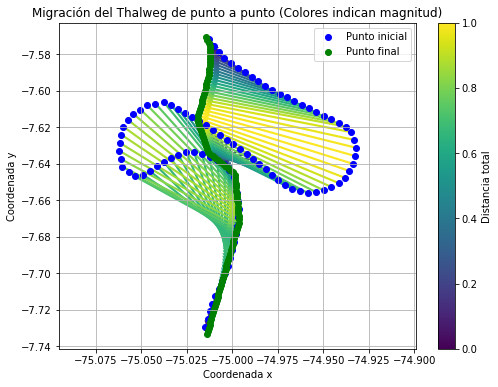

In [6]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Almacenar las coordenadas y y x en listas separadas
y_values = [p.y for p in points_original]
x_values = [p.x for p in points_original]

# Crear un DataFrame con columnas para coordenadas y y x
df = pd.DataFrame({'O_y': y_values, 'O_x': x_values})

# Mostrar el DataFrame
print(df)

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Almacenar las coordenadas y y x en listas separadas para migración
y_values_migracion = [p.y for p in points_migracion]
x_values_migracion = [p.x for p in points_migracion]

# Agregar las columnas correspondientes al DataFrame para migración
df['M_y'] = y_values_migracion
df['M_x'] = x_values_migracion

# Mostrar el DataFrame actualizado
df['NN_x'] = np.nan
df['NN_y'] = np.nan

# Calcular las coordenadas más cercanas en migración para cada punto original
for index, row in df.iterrows():
    original_point = np.array([row['O_x'], row['O_y']])
    migration_points = df[['M_x', 'M_y']].values
    distances = cdist([original_point], migration_points)[0]
    nearest_index = np.argmin(distances)
    nearest_migracion = migration_points[nearest_index]
    df.at[index, 'NN_x'] = nearest_migracion[0]
    df.at[index, 'NN_y'] = nearest_migracion[1]

# Mostrar el DataFrame actualizado
print(df)


# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values/np.max(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


In [3]:
import geopandas as gpd

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('Original.shp')
gdf_final = gpd.read_file('Migracion.shp')

# Comprobar que las coordenadas estén en el mismo sistema de referencia
if gdf_original.crs != gdf_final.crs:
    raise ValueError("Las capas no tienen el mismo sistema de referencia espacial.")

# Extraer las geometrías de las líneas
lines_original = gdf_original['geometry']
lines_final = gdf_final['geometry']


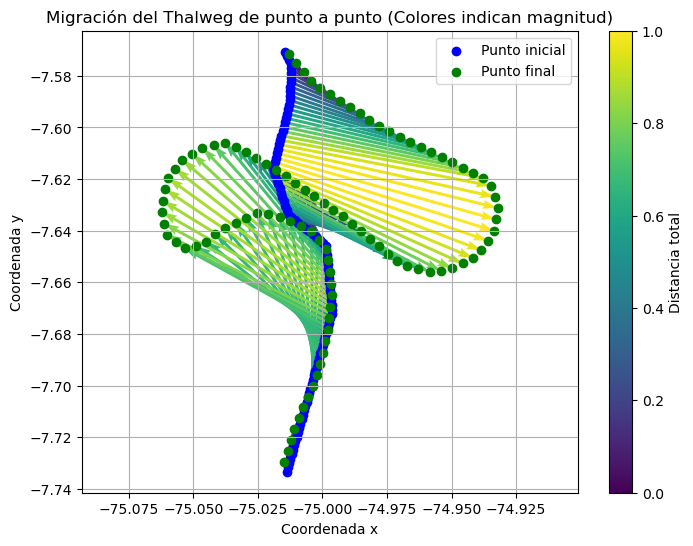

In [6]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values/np.max(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


In [7]:
!pip install fastdtw dtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp39-cp39-macosx_10_9_x86_64.whl size=90383 sha256=e8e5afd4b9dde94a84e981fc394f1c877b538913b80a1f1f9853d09dbdde6ef0
  Stored in directory: /Users/miguelandrade/Library/Caches/pip/wheels/1f/a1/63/bfd0fddb5bf0b59f564872e29272cee8a2de0cd745d88fede5
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5301 sha256=73aeb14320af6f48c1fdfe672c1b1624cfc9a790a7749334b44fb5ce73513b26
  Stored in directory: /Users/miguelandrade/Library/Caches/pip/wheels/b4/fe/94/72ad3df3a67605236d3fac0891a64eef2eeedad1a1e0639076
Successfully built fastdtw dtw


Distancia DTW: 3.775228851828757


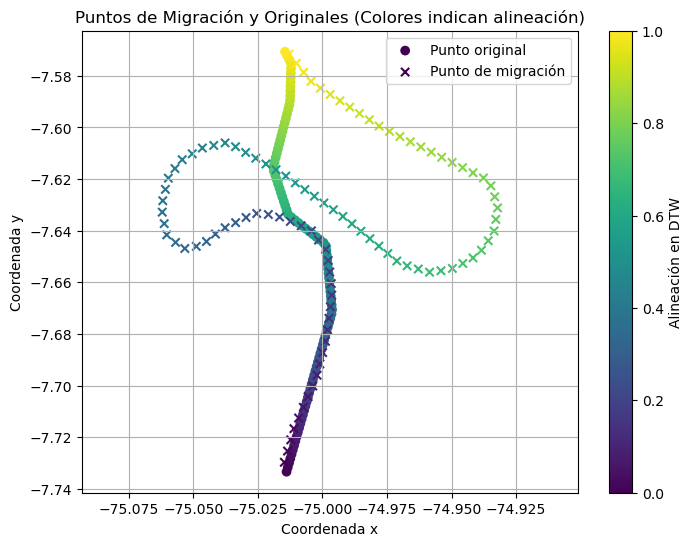

In [10]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from fastdtw import fastdtw
from dtw import dtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Calcular la distancia DTW o FastDTW entre los conjuntos de puntos
if 'fastdtw' in globals():
    distance, _ = fastdtw(points_original_coords, points_migracion_coords)
else:
    distance, _, _, _ = dtw(points_original_coords.T, points_migracion_coords.T)

print(f"Distancia DTW: {distance}")

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values/np.max(values))

# Crear un nuevo gráfico para representar los puntos de migración y originales
plt.figure(figsize=(8, 6))
colors = color_mapper(np.arange(num_points), cmap='viridis')
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
            c=colors, cmap='viridis', label='Punto original')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion],
            c=colors, cmap='viridis', marker='x', label='Punto de migración')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de Migración y Originales (Colores indican alineación)')
plt.colorbar(label='Alineación en DTW')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()

# Aquí puedes continuar con el resto de tu código para cálculos adicionales


In [15]:
# !pip uninstall dtw -y
!pip install dtw-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.3/314.3 kB 5.2 MB/s eta 0:00:0000:01


In [21]:
dtw

<function dtw.dtw.dtw(x, y, dist, warp=1, w=inf, s=1.0)>

In [22]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from dtw import dtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos (puedes usar otras métricas según tu necesidad)
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos
distance, _, _, _ = dtw(points_original_coords.T, points_migracion_coords.T, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Resto de tu código para cálculos, gráficos, etc.


Distancia DTW: 0.755840541357746


Distancia DTW: 0.755840541357746


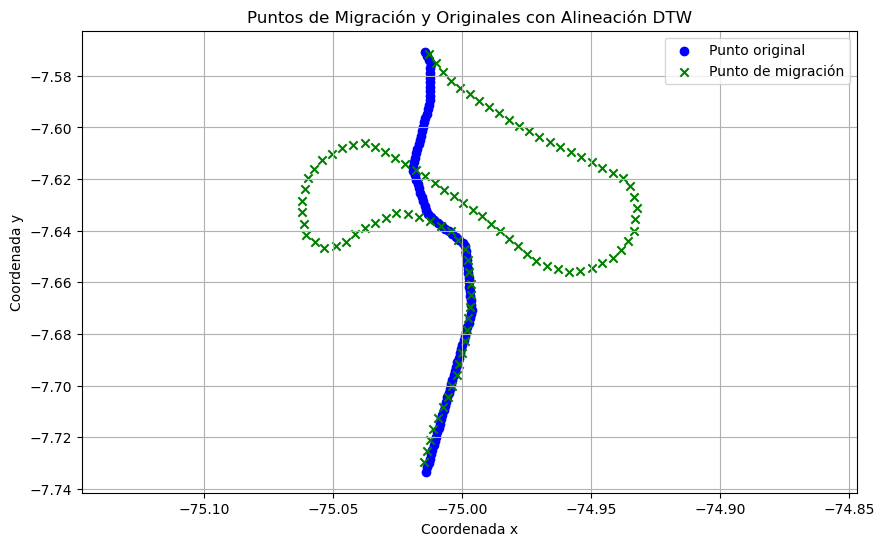

In [27]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from dtw import dtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos (puedes usar otras métricas según tu necesidad)
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos
distance, _, path, _ = dtw(points_original_coords.T, points_migracion_coords.T, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Crear un nuevo gráfico para representar los puntos de migración y originales con las rectas de alineación
plt.figure(figsize=(10, 6))
plt.scatter(points_original_coords[:, 0], points_original_coords[:, 1],
            color='blue', label='Punto original')
plt.scatter(points_migracion_coords[:, 0], points_migracion_coords[:, 1],
            color='green', marker='x', label='Punto de migración')

# Dibujar las rectas de alineación


plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de Migración y Originales con Alineación DTW')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


Distancia DTW: 0.755840541357746


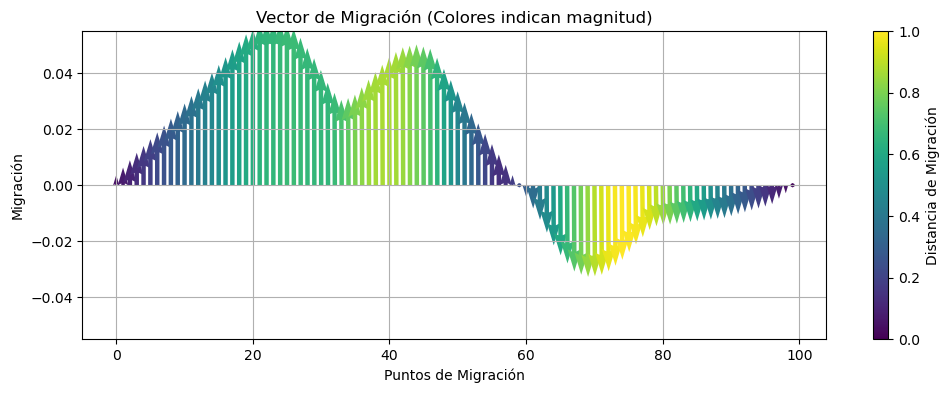

In [30]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from dtw import dtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos (puedes usar otras métricas según tu necesidad)
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos
distance, _, path, _ = dtw(points_original_coords.T, points_migracion_coords.T, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Calcular el vector de migración
migration_vector = points_migracion_coords - points_original_coords

# Calcular las magnitudes de los vectores de migración
migration_magnitudes = np.linalg.norm(migration_vector, axis=1)

# Crear un nuevo gráfico tipo ADN con colores proporcionales a la distancia
plt.figure(figsize=(12, 4))
plt.quiver(range(num_points), np.zeros(num_points),
           migration_vector[:, 0], migration_vector[:, 1],
           angles='xy', scale_units='xy', scale=1, color=plt.cm.viridis(migration_magnitudes / np.max(migration_magnitudes)))
plt.xlabel('Puntos de Migración')
plt.ylabel('Migración')
plt.title('Vector de Migración (Colores indican magnitud)')
plt.colorbar(label='Distancia de Migración')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Distancia DTW: 0.755840541357746


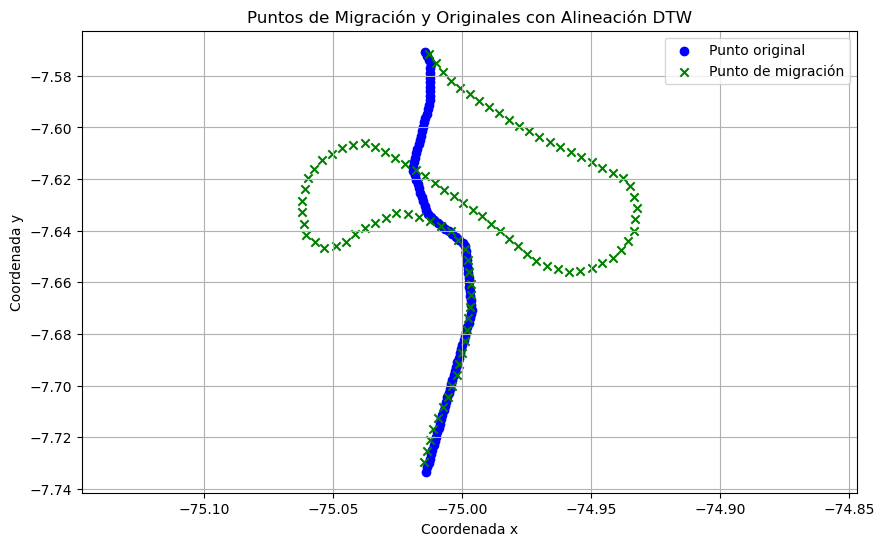

In [60]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from dtw import dtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos (puedes usar otras métricas según tu necesidad)
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos
distance, _, path, _ = dtw(points_original_coords.T, points_migracion_coords.T, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Crear un nuevo gráfico para representar los puntos de migración y originales con las rectas de alineación
plt.figure(figsize=(10, 6))
plt.scatter(points_original_coords[:, 0], points_original_coords[:, 1],
            color='blue', label='Punto original')
plt.scatter(points_migracion_coords[:, 0], points_migracion_coords[:, 1],
            color='green', marker='x', label='Punto de migración')

# Dibujar las rectas de alineación


plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de Migración y Originales con Alineación DTW')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


In [62]:
# Obtener los índices de los puntos alineados
aligned_indices_original = [int(idx[0]) for idx in path]
aligned_indices_migracion = [int(idx[1]) for idx in path]

# Obtener las coordenadas de los puntos alineados
points_aligned_original = points_original_coords[aligned_indices_original]
points_aligned_migracion = points_migracion_coords[aligned_indices_migracion]

# Crear un nuevo gráfico para representar los puntos alineados
plt.figure(figsize=(10, 6))
plt.scatter(points_aligned_original[:, 0], points_aligned_original[:, 1],
            color='blue', label='Punto original alineado')
plt.scatter(points_aligned_migracion[:, 0], points_aligned_migracion[:, 1],
            color='green', marker='x', label='Punto de migración alineado')

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de Migración y Originales Alineados con DTW')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


IndexError: index 673 is out of bounds for axis 0 with size 100

In [51]:
import pandas as pd

# Crear un DataFrame para los puntos originales y los puntos de migración
data = {
    'Original_X': points_original_coords[:, 0],
    'Original_Y': points_original_coords[:, 1],
    'Migracion_X': points_migracion_coords[:, 0],
    'Migracion_Y': points_migracion_coords[:, 1]
}

df_puntos = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
df_puntos.to_csv('puntos_migracion.csv', index=False)


In [52]:
df_puntos

,Original_X,Original_Y,Migracion_X,Migracion_Y
0,-75.013921,-7.733394,-75.014765,-7.729734
1,-75.013433,-7.731698,-75.013529,-7.725391
2,-75.012946,-7.730001,-75.012293,-7.721048
3,-75.012458,-7.728305,-75.011057,-7.716706
4,-75.011971,-7.726608,-75.009248,-7.712571
...,...,...,...,...
95,-75.012191,-7.577142,-75.000804,-7.584774
96,-75.012138,-7.575378,-75.004431,-7.582139
97,-75.012864,-7.573792,-75.007267,-7.578626
98,-75.013682,-7.572228,-75.010102,-7.575112


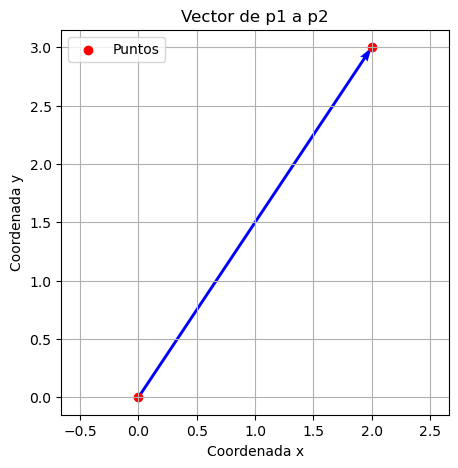

In [58]:
import matplotlib.pyplot as plt

# Coordenadas de los puntos p1 y p2
p1_x, p1_y = 0, 0  # Coordenadas de p1
p2_x, p2_y = 2, 3  # Coordenadas de p2

# Calcular las componentes del vector (U y V) que va de p1 a p2
vector_u = p2_x - p1_x
vector_v = p2_y - p1_y

# Crear el gráfico y graficar el vector usando quiver
plt.figure(figsize=(5, 5))
plt.quiver(p1_x, p1_y, vector_u, vector_v, angles='xy', scale_units='xy', scale=1, color='blue')
plt.scatter([p1_x, p2_x], [p1_y, p2_y], color='red', label='Puntos')
plt.xlim(-1, 3)
plt.ylim(-1, 4)
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Vector de p1 a p2')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


In [70]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])




Distancia DTW: 3.1620064375783694


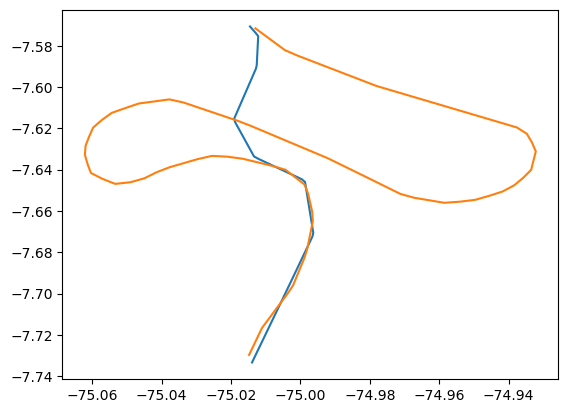

In [86]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from fastdtw import fastdtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos usando FastDTW
distance, path = fastdtw(points_original_coords, points_migracion_coords, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Obtener los índices de los puntos alineados
indices_original, indices_migracion = zip(*path)

# Obtener las coordenadas de los puntos alineados
points_aligned_original = points_original_coords[np.array(indices_original, dtype=int)]
points_aligned_migracion = points_migracion_coords[np.array(indices_migracion, dtype=int)]


plt.plot(points_aligned_original[:,0],points_aligned_original[:,1])
plt.plot(points_aligned_migracion[:,0],points_aligned_migracion[:,1])


Distancia DTW: 3.1620064375783694


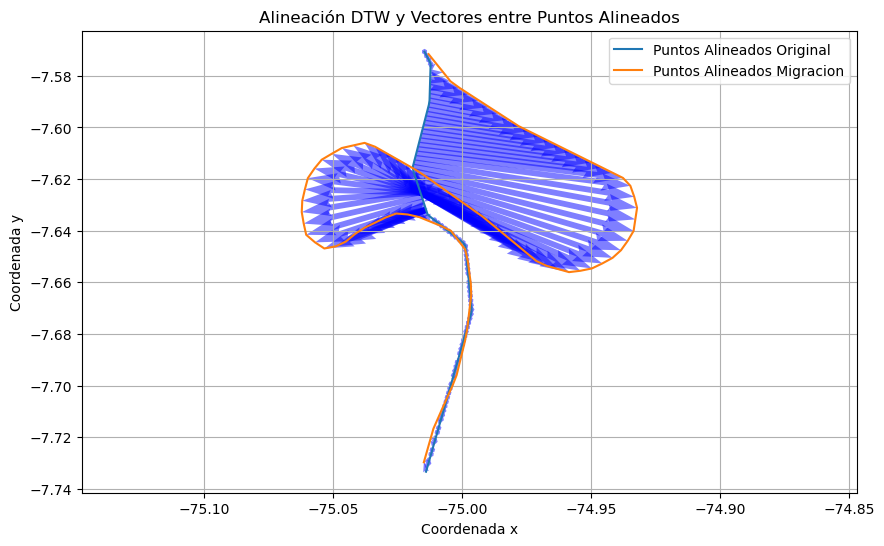

In [89]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos usando FastDTW
distance, path = fastdtw(points_original_coords, points_migracion_coords, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Obtener los índices de los puntos alineados
indices_original, indices_migracion = zip(*path)

# Obtener las coordenadas de los puntos alineados
points_aligned_original = points_original_coords[np.array(indices_original, dtype=int)]
points_aligned_migracion = points_migracion_coords[np.array(indices_migracion, dtype=int)]

# Crear el gráfico para representar los puntos alineados y el vector
plt.figure(figsize=(10, 6))

# Graficar los puntos alineados
plt.plot(points_aligned_original[:, 0], points_aligned_original[:, 1], label='Puntos Alineados Original')
plt.plot(points_aligned_migracion[:, 0], points_aligned_migracion[:, 1], label='Puntos Alineados Migracion')

# Graficar los vectores entre los puntos alineados
for i in range(len(points_aligned_original)):
    plt.quiver(points_aligned_original[i, 0], points_aligned_original[i, 1],
               points_aligned_migracion[i, 0] - points_aligned_original[i, 0],
               points_aligned_migracion[i, 1] - points_aligned_original[i, 1],
               angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Alineación DTW y Vectores entre Puntos Alineados')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


Distancia DTW: 1.9362892500256685


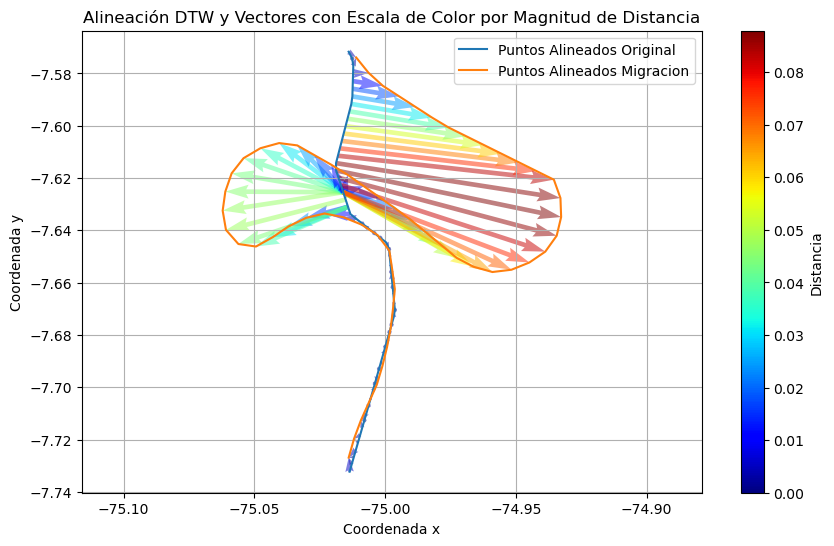

In [112]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 60
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos usando FastDTW
distance, path = fastdtw(points_original_coords, points_migracion_coords, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Obtener los índices de los puntos alineados
indices_original, indices_migracion = zip(*path)

# Obtener las coordenadas de los puntos alineados
points_aligned_original = points_original_coords[np.array(indices_original, dtype=int)]
points_aligned_migracion = points_migracion_coords[np.array(indices_migracion, dtype=int)]

# Calcular las distancias entre los puntos alineados
distances = np.linalg.norm(points_aligned_migracion - points_aligned_original, axis=1)

# Crear el gráfico para representar los puntos alineados y el vector
plt.figure(figsize=(10, 6))

# Graficar los puntos alineados
plt.plot(points_aligned_original[:, 0], points_aligned_original[:, 1], label='Puntos Alineados Original')
plt.plot(points_aligned_migracion[:, 0], points_aligned_migracion[:, 1], label='Puntos Alineados Migracion')

# Graficar los vectores entre los puntos alineados con escala de color
for i in range(len(points_aligned_original)):
    plt.quiver(points_aligned_original[i, 0], points_aligned_original[i, 1],
               points_aligned_migracion[i, 0] - points_aligned_original[i, 0],
               points_aligned_migracion[i, 1] - points_aligned_original[i, 1],
               angles='xy', scale_units='xy', scale=1,
               color=plt.cm.jet(distances[i] / np.max(distances)), alpha=0.5)

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Alineación DTW y Vectores con Escala de Color por Magnitud de Distancia')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Agregar la barra de color
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet,
                           norm=plt.Normalize(vmin=0, vmax=np.max(distances)))
sm.set_array([])  # Para que la barra de color refleje los valores de distancia
cbar = plt.colorbar(sm, label='Distancia')

# Mostrar el gráfico
plt.show()


Distancia DTW: 3.1620064375783694


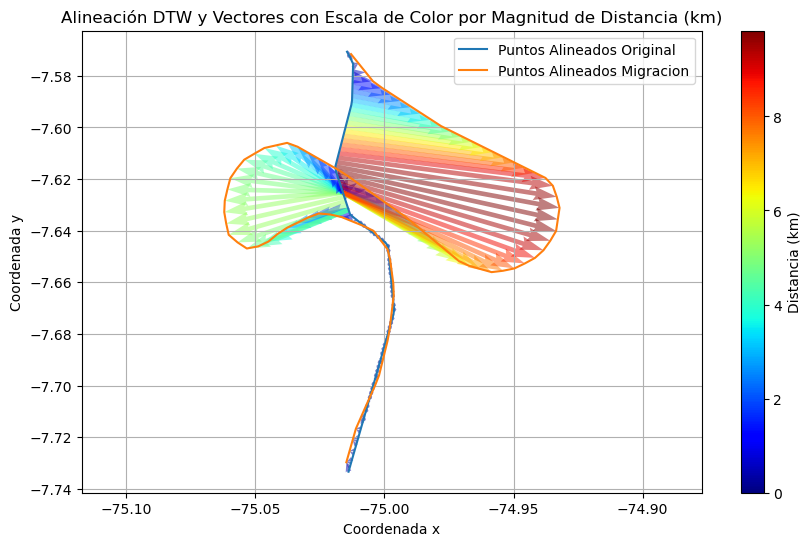

In [110]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos usando FastDTW
distance, path = fastdtw(points_original_coords, points_migracion_coords, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Obtener los índices de los puntos alineados
indices_original, indices_migracion = zip(*path)

# Obtener las coordenadas de los puntos alineados
points_aligned_original = points_original_coords[np.array(indices_original, dtype=int)]
points_aligned_migracion = points_migracion_coords[np.array(indices_migracion, dtype=int)]

# Calcular las distancias entre los puntos alineados en kilómetros
earth_radius_km = 6371.0  # Radio de la Tierra en kilómetros
distances_km = np.linalg.norm(points_aligned_migracion - points_aligned_original, axis=1) * (np.pi / 180) * earth_radius_km

# Crear el gráfico para representar los puntos alineados y el vector
plt.figure(figsize=(10, 6))

# Graficar los puntos alineados
plt.plot(points_aligned_original[:, 0], points_aligned_original[:, 1], label='Puntos Alineados Original')
plt.plot(points_aligned_migracion[:, 0], points_aligned_migracion[:, 1], label='Puntos Alineados Migracion')

# Graficar los vectores entre los puntos alineados con escala de color en kilómetros
for i in range(len(points_aligned_original)):
    plt.quiver(points_aligned_original[i, 0], points_aligned_original[i, 1],
               points_aligned_migracion[i, 0] - points_aligned_original[i, 0],
               points_aligned_migracion[i, 1] - points_aligned_original[i, 1],
               angles='xy', scale_units='xy', scale=1,
               color=plt.cm.jet(distances_km[i] / np.max(distances_km)), alpha=0.5)

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Alineación DTW y Vectores con Escala de Color por Magnitud de Distancia (km)')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Agregar la barra de color
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet,
                           norm=plt.Normalize(vmin=0, vmax=np.max(distances_km)))
sm.set_array([])  # Para que la barra de color refleje los valores de distancia
cbar = plt.colorbar(sm, label='Distancia (km)')

# Mostrar el gráfico
plt.show()


In [114]:
# import geopandas as gpd
# import numpy as np
# import matplotlib.pyplot as plt
# from fastdtw import fastdtw

# # ... (tu código anterior) ...

# # Crear GeoDataFrame con los vectores y sus magnitudes
# vectors = points_aligned_migracion - points_aligned_original
# gdf_vectors = gpd.GeoDataFrame(geometry=gpd.points_from_xy(points_aligned_original[:, 0], points_aligned_original[:, 1]))
# gdf_vectors['vector_x'] = vectors[:, 0]
# gdf_vectors['vector_y'] = vectors[:, 1]
# gdf_vectors['magnitude'] = distances_km

# # Exportar GeoDataFrame de los vectores como shapefile
# gdf_vectors.to_file('vectors.shp')

# # Crear el gráfico para representar los puntos alineados y el vector
# plt.figure(figsize=(10, 6))

# # Graficar los puntos alineados
# plt.plot(points_aligned_original[:, 0], points_aligned_original[:, 1], label='Puntos Alineados Original')
# plt.plot(points_aligned_migracion[:, 0], points_aligned_migracion[:, 1], label='Puntos Alineados Migracion')

# # Graficar los vectores entre los puntos alineados con escala de color en kilómetros
# for i in range(len(points_aligned_original)):
#     plt.quiver(points_aligned_original[i, 0], points_aligned_original[i, 1],
#                points_aligned_migracion[i, 0] - points_aligned_original[i, 0],
#                points_aligned_migracion[i, 1] - points_aligned_original[i, 1],
#                angles='xy', scale_units='xy', scale=1,
#                color=plt.cm.jet(distances_km[i] / np.max(distances_km)), alpha=0.5)

# plt.xlabel('Coordenada x')
# plt.ylabel('Coordenada y')
# plt.title('Alineación DTW y Vectores con Escala de Color por Magnitud de Distancia (km)')
# plt.legend()
# plt.grid(True)
# plt.axis('equal')

# # Agregar la barra de color
# sm = plt.cm.ScalarMappable(cmap=plt.cm.jet,
#                            norm=plt.Normalize(vmin=0, vmax=np.max(distances_km)))
# sm.set_array([])  # Para que la barra de color refleje los valores de distancia
# cbar = plt.colorbar(sm, label='Distancia (km)')

# # Mostrar el gráfico
# plt.show()


In [93]:
# import geopandas as gpd
# import numpy as np
# import matplotlib.pyplot as plt
# from fastdtw import fastdtw

# # Cargar los GeoDataFrames desde los archivos shapefile
# gdf_original = gpd.read_file('./Migracion.shp')
# gdf_migracion = gpd.read_file('./Original.shp')

# # Obtener las geometrías de las líneas de los GeoDataFrames
# line_original = gdf_original['geometry'].iloc[0]
# line_migracion = gdf_migracion['geometry'].iloc[0]

# # Remuestreo de las líneas para obtener puntos equidistantes
# num_points = 100
# # Crear puntos equidistantes en la línea original
# points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
# # Crear puntos equidistantes en la línea de migración
# points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# # Convertir puntos a coordenadas (x, y) para usar en DTW
# points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
# points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# # Función de distancia entre puntos
# def distance_function(x, y):
#     return np.linalg.norm(x - y)

# # Calcular la distancia DTW entre los conjuntos de puntos usando FastDTW
# distance, path = fastdtw(points_original_coords, points_migracion_coords, dist=distance_function)

# print(f"Distancia DTW: {distance}")

# # Obtener los índices de los puntos alineados
# indices_original, indices_migracion = zip(*path)

# # Obtener las coordenadas de los puntos alineados
# points_aligned_original = points_original_coords[np.array(indices_original, dtype=int)]
# points_aligned_migracion = points_migracion_coords[np.array(indices_migracion, dtype=int)]

# # Calcular las distancias entre los puntos alineados en kilómetros
# earth_radius_km = 6371.0  # Radio de la Tierra en kilómetros
# distances_km = np.linalg.norm(points_aligned_migracion - points_aligned_original, axis=1) * (np.pi / 180) * earth_radius_km

# # Crear GeoDataFrames con los puntos alineados y las distancias
# gdf_points_aligned = gpd.GeoDataFrame(geometry=gpd.points_from_xy(points_aligned_original[:, 0], points_aligned_original[:, 1]))
# gdf_points_aligned['distances_km'] = distances_km

# # Exportar GeoDataFrames como shapefiles
# gdf_points_aligned.to_file('points_aligned.shp')


Distancia DTW: 3.1620064375783694


/var/folders/ty/3y6dblhx0h1d076pxyk3sh700000gn/T/ipykernel_13517/2381928980.py:50: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_points_aligned.to_file('points_aligned.shp')


In [115]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Convertir puntos a coordenadas (x, y) para usar en DTW
points_original_coords = np.array([(p_original.x, p_original.y) for p_original in points_original])
points_migracion_coords = np.array([(p_migracion.x, p_migracion.y) for p_migracion in points_migracion])

# Función de distancia entre puntos
def distance_function(x, y):
    return np.linalg.norm(x - y)

# Calcular la distancia DTW entre los conjuntos de puntos usando FastDTW
distance, path = fastdtw(points_original_coords, points_migracion_coords, dist=distance_function)

print(f"Distancia DTW: {distance}")

# Obtener los índices de los puntos alineados
indices_original, indices_migracion = zip(*path)

# Obtener las coordenadas de los puntos alineados
points_aligned_original = points_original_coords[np.array(indices_original, dtype=int)]
points_aligned_migracion = points_migracion_coords[np.array(indices_migracion, dtype=int)]

# Calcular las distancias entre los puntos alineados en kilómetros
earth_radius_km = 6371.0  # Radio de la Tierra en kilómetros
distances_km = np.linalg.norm(points_aligned_migracion - points_aligned_original, axis=1) * (np.pi / 180) * earth_radius_km

# Crear GeoDataFrames con los vectores y sus magnitudes
vectors = points_aligned_migracion - points_aligned_original
gdf_vectors = gpd.GeoDataFrame(geometry=gpd.points_from_xy(points_aligned_original[:, 0], points_aligned_original[:, 1]))
gdf_vectors['vector_x'] = vectors[:, 0]
gdf_vectors['vector_y'] = vectors[:, 1]
gdf_vectors['magnitude'] = distances_km

# Exportar GeoDataFrame de los vectores como shapefile
gdf_vectors.to_file('vectors.shp')
# el vector tiene magnitud en x, y ademas de magnitud 


Distancia DTW: 3.1620064375783694
